# Soft_rotate_Fe_Mt

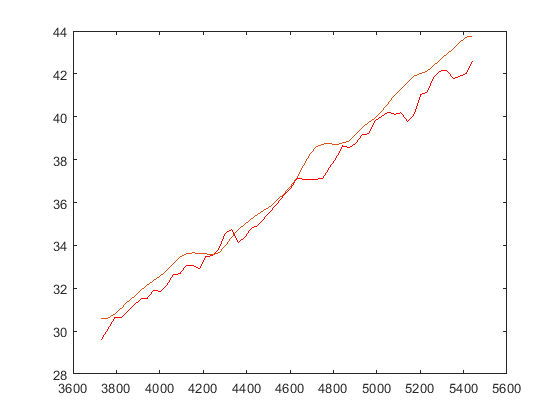

In [1]:
clc;clear;close all;
cd("D:\桌面\毕设\材料\摩阻扭矩\MATLAB")
%% 
trajectory_parameters = xlsread('LH11-1-B4H3.xlsx','轨道','A2:C10000');       % 读取轨道数据，依次为井深、井斜角、井斜方位角
pipe_parameters = xlsread('LH11-1-B4H3.xlsx','管柱数据','C5:G16');      % 读取套管柱数据，依次为内径，外径，接头外径，强度，长度
well_parameters = xlsread('LH11-1-B4H3.xlsx','井身结构','A2:C3');     % 读取井身结构数据，依次为1上层导管下入深度，2上层套管内径，3井眼直径
drill_parameters = xlsread('LH11-1-B4H3.xlsx','钻进数据','A2:G10000');       % 读取钻进数据，依次为1井深，2钻压，3钻头扭矩，4转速，5管柱运动速度，6排量，7钻井液密度
HK_TOR = xlsread('LH11-1-B4H3.xlsx','测量值','A2:C1000');       % 读取1井深2钩载3转盘扭矩
%% 旋转钻进
[V,N,E,S] = cal_trajectory(trajectory_parameters,1);
[alpha,k,kal,kph,tau,dk_ds,tz,nz,bz,dalpha_ds,dpha_ds]=traj_para_linear(trajectory_parameters);      % 自定义函数计算插值后的计算轨迹参数
DATA_CAL = [alpha,k,kal,kph,tau,dk_ds,tz,nz,bz,dalpha_ds,dpha_ds];
[m,n] = size(drill_parameters );      % 钻进数据长度
depth_start = ceil(drill_parameters(1,1));        % 钻进开始井深
depth_end = floor(drill_parameters(m,1));         % 钻进开始井深
mu1 = 0.2096;       % 套管段摩阻系数
mu2 = 0.3097;       % 裸眼段摩阻系数
mu_cal = [mu1,mu2];
dL = 1;
for i = 1:m
    depth_i = drill_parameters(i,1);        % 钻进井深
    if depth_i < well_parameters(2,1)
        pipe_parameters_i = pipe_parameters(1:5,:);
        well_parameters_i = well_parameters(1,:);
    else
        pipe_parameters_i = pipe_parameters(6:10,:);
        well_parameters_i = well_parameters(2,:);
    end
    drill_parameters_i = drill_parameters(i,:);
    [Fe,Mt,wc] = drill_rotate_soft_cal_Mt_Fe(depth_i,pipe_parameters_i,well_parameters_i,drill_parameters_i,alpha,k,tau,dk_ds,tz,nz,bz,[mu1,mu2],dL,0);
    Hookload(i,:) = Fe(1)/1000;     % 记录相应深度处的大钩载荷值
    Torque(i,:) = Mt(1)/1000;
    depth_cal(i,:) = depth_i;
end
plot(depth_cal,Torque,'r');hold on;plot(HK_TOR(:,1),HK_TOR(:,3))